## 1. Load Libraries and Dataset

In [16]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [17]:
df = pd.read_csv('netflix_titles.csv')
df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


In [18]:
# Basic Information & Overview
print("Shape of the dataset:", df.shape)
print("\n Data Info:\n")
df.info()

# Summary Statistics
print(df.describe(include='all'))

Shape of the dataset: (8807, 12)

 Data Info:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8807 non-null   object
 1   type          8807 non-null   object
 2   title         8807 non-null   object
 3   director      6173 non-null   object
 4   cast          7982 non-null   object
 5   country       7976 non-null   object
 6   date_added    8797 non-null   object
 7   release_year  8807 non-null   int64 
 8   rating        8803 non-null   object
 9   duration      8804 non-null   object
 10  listed_in     8807 non-null   object
 11  description   8807 non-null   object
dtypes: int64(1), object(11)
memory usage: 825.8+ KB
       show_id   type   title       director                cast  \
count     8807   8807    8807           6173                7982   
unique    8807      2    8807           4528                7692   
t

## 2. Cleaning

### 1. Missing Values

In [19]:
missing = pd.DataFrame({
    'missing_count': df.isnull().sum(),
    'missing_percent': (df.isnull().sum() / len(df)) * 100
}).sort_values(by='missing_percent', ascending=False)
print(missing)

              missing_count  missing_percent
director               2634        29.908028
country                 831         9.435676
cast                    825         9.367549
date_added               10         0.113546
rating                    4         0.045418
duration                  3         0.034064
show_id                   0         0.000000
type                      0         0.000000
title                     0         0.000000
release_year              0         0.000000
listed_in                 0         0.000000
description               0         0.000000


### 2. Handling Missing Values

In [20]:
# Fill categorical missing values with mode for all object columns
cat_cols = df.select_dtypes(include=['object']).columns
for col in cat_cols:
    df[col] = df[col].fillna(df[col].mode()[0])

In [21]:
# Drop duplicates
print("Duplicate rows before cleaning:", df.duplicated().sum())
df.drop_duplicates(inplace=True)
print("Duplicate rows after cleaning:", df.duplicated().sum())

Duplicate rows before cleaning: 0
Duplicate rows after cleaning: 0


In [8]:
# Convert 'type' column to category dtype
df['type'] = df['type'].astype('category')

print("Missing Values after Cleaning:\n", df.isnull().sum())

Missing Values after Cleaning:
 show_id         0
type            0
title           0
director        0
cast            0
country         0
date_added      0
release_year    0
rating          0
duration        0
listed_in       0
description     0
dtype: int64


## 3. Univariate, Bivariate & Multivariate Analysis

### Univariate Analysis - Categorical Features

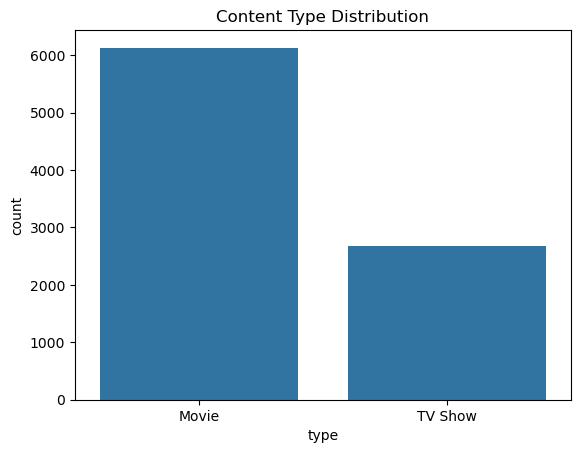

In [22]:
sns.countplot(x='type', data=df)
plt.title('Content Type Distribution')
plt.show()

### Univariate Analysis - Numerical Features (Release Year)

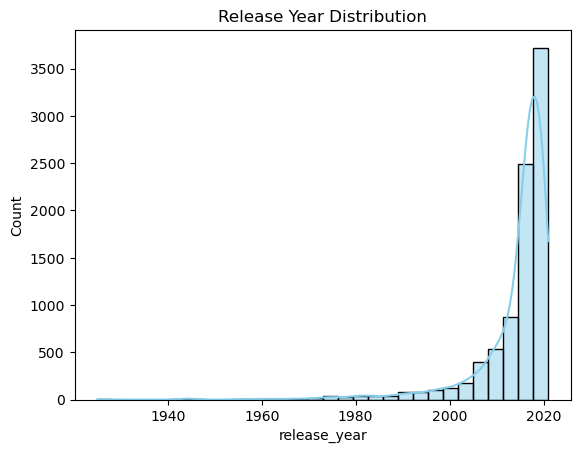

In [23]:
sns.histplot(df['release_year'], bins=30, kde=True, color='skyblue')
plt.title('Release Year Distribution')
plt.show()


### Bivariate Analysis

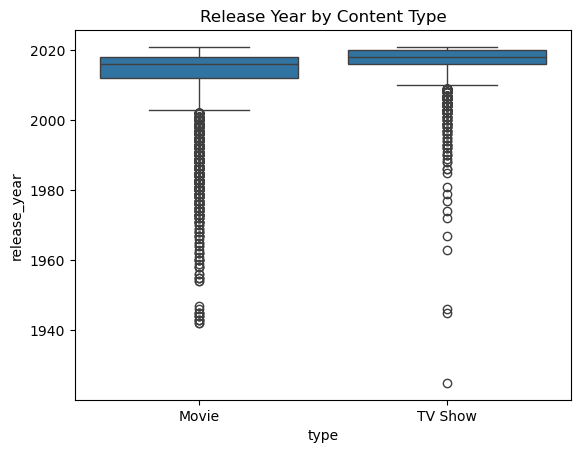

In [24]:
sns.boxplot(x='type', y='release_year', data=df)
plt.title('Release Year by Content Type')
plt.show()


### Correlation and Multivariate Analysis
#### Note: Mostly categorical data, correlation limited - showing counts only

### 4. Outlier Detection using IQR on 'release_year'

In [25]:
Q1 = df['release_year'].quantile(0.25)
Q3 = df['release_year'].quantile(0.75)
IQR = Q3 - Q1
lower = Q1 - 1.5 * IQR
upper = Q3 + 1.5 * IQR
outliers = df[(df['release_year'] < lower) | (df['release_year'] > upper)]
print('Number of outliers in release_year:', len(outliers))


Number of outliers in release_year: 719


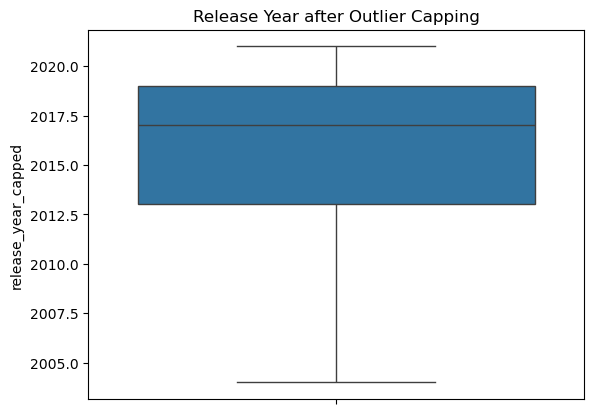

In [13]:
# Cap/floor outliers
df['release_year_capped'] = df['release_year'].clip(lower, upper)
sns.boxplot(df['release_year_capped'])
plt.title('Release Year after Outlier Capping')
plt.show()

## 5. Feature Engineering (Example)

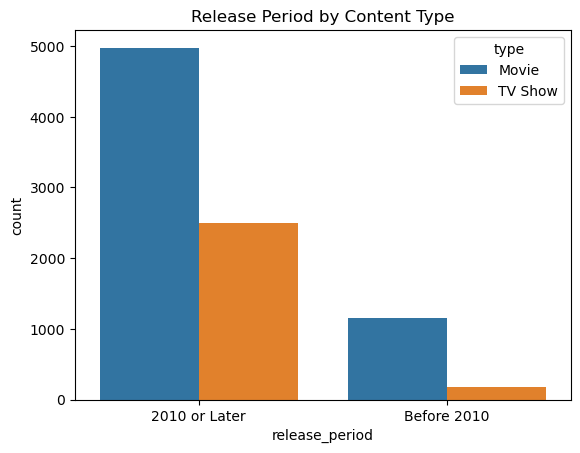

In [26]:
# Create a new feature 'release_period' to classify years before vs after 2010
df['release_period'] = df['release_year'].apply(lambda x: 'Before 2010' if x < 2010 else '2010 or Later')
sns.countplot(x='release_period', hue='type', data=df)
plt.title('Release Period by Content Type')
plt.show()

### 6. Key Insights
#### - Most content on Netflix has been released after 2010.
#### - Movies and TV Shows have roughly balanced distribution.
#### - There are some release year outliers with very old content.
#### - The new feature 'release_period' helps distinguish between classic and modern content.

## Export cleaned data

In [27]:
df.to_csv("Netflix_cleaned.csv", index=False)
print("\nCleaned Netflix data saved as Netflix_cleaned.csv")


Cleaned Netflix data saved as Netflix_cleaned.csv
